In [275]:
#What am I trying to do?
#success = win battle
#1. Explore data to look for possible correlations x
# - Stats to success x
# - Type to success  x
# - Generation to success x
# - Legendary to success x
#2. Create model to predict success
# - I want to take a pokemon's features and use them to predict battles against other pokemon 
# - How do I combine the pokemon's features and the test data into one usable piece?
#3. LAST TODOS:
# - Randomize data x
# - Split into train and test to measure x
# - Experiment with number of hidden layer and broadening existing hidden x
# - Normalize values (divide by maximum value of feature) x
# - Seperate data such that pokemon in training set arent in test set
import numpy as np # linear algebra
import pandas as pd 
import matplotlib.pyplot as plt

data = pd.read_csv('../FinalProject/pokemon-challenge/pokemon.csv')

In [276]:
data.head(10)

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False
5,6,Charmeleon,Fire,NaN,58,64,58,80,65,80,1,False
6,7,Charizard,Fire,Flying,78,84,78,109,85,100,1,False
7,8,Mega Charizard X,Fire,Dragon,78,130,111,130,85,100,1,False
8,9,Mega Charizard Y,Fire,Flying,78,104,78,159,115,100,1,False
9,10,Squirtle,Water,NaN,44,48,65,50,64,43,1,False


In [277]:
data.tail()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,796,Diancie,Rock,Fairy,50,100,150,100,150,50,6,True
796,797,Mega Diancie,Rock,Fairy,50,160,110,160,110,110,6,True
797,798,Hoopa Confined,Psychic,Ghost,80,110,60,150,130,70,6,True
798,799,Hoopa Unbound,Psychic,Dark,80,160,60,170,130,80,6,True
799,800,Volcanion,Fire,Water,80,110,120,130,90,70,6,True


In [278]:
data.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary'],
      dtype='object')

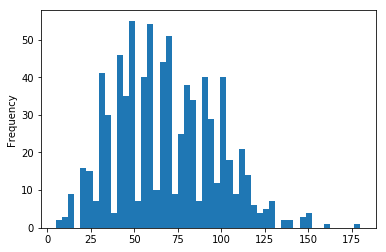

In [279]:
data.Speed.plot(kind = 'hist',bins = 50)
plt.show()

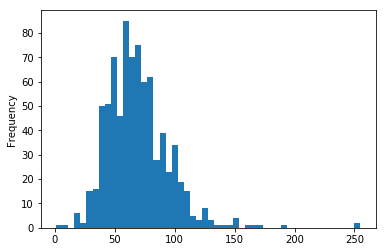

In [280]:
data.HP.plot(kind = 'hist',bins = 50)
plt.show()

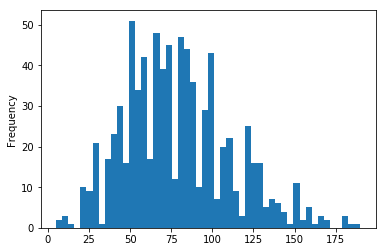

In [281]:
data.Attack.plot(kind = 'hist',bins = 50)
plt.show()

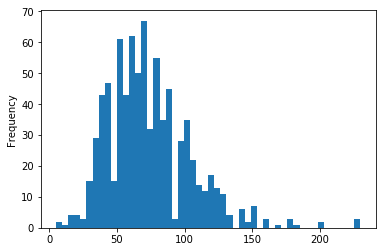

In [282]:
data.Defense.plot(kind = 'hist',bins = 50)
plt.show()

In [327]:
battleData = pd.read_csv('../FinalProject/pokemon-challenge/combats.csv')
numBattles = len(battleData)
print(numBattles)
# print(battleData.head(10))

50000


In [328]:
battleData.head(10)

,First_pokemon,Second_pokemon,Winner
0,266,298,298
1,702,701,701
2,191,668,668
3,237,683,683
4,151,231,151
5,657,752,657
6,192,134,134
7,73,545,545
8,220,763,763
9,302,31,31


In [284]:
#A dictionary of tuples, first value = number of wins, second value = number of battles
pokemonDict = {}
for pokemonNum in data['#']:
    pokemonDict[pokemonNum] = [0, 0]

#Calc number of wins
for battle in battleData['Winner']:
    pokemonDict[battle][0] = pokemonDict[battle][0] + 1
    
#Calc number of battles
for battle in battleData['First_pokemon']:
    pokemonDict[battle][1] = pokemonDict[battle][1] + 1
    
for battle in battleData['Second_pokemon']:
    pokemonDict[battle][1] = pokemonDict[battle][1] + 1
    
winsArray = []
winrateArray = []
lossArray = []
for pokemon in pokemonDict:
    winsArray.append(pokemonDict[pokemon][0])
    #Weirdly Some Pokemon don't battle
    if(pokemonDict[pokemon][1] != 0):
        winrateArray.append(pokemonDict[pokemon][0]/pokemonDict[pokemon][1]*100)
    else:
        print('No battle Pokemon:', pokemon)
        winrateArray.append(0.0000)
    lossArray.append(pokemonDict[pokemon][1] - pokemonDict[pokemon][0])
columnName = "Wins"
data[columnName] = winsArray
columnName = "Winrate"
data[columnName] = winrateArray
print(data.head(10))
columnName = "Losses"
data[columnName] = lossArray

No battle Pokemon: 12
No battle Pokemon: 33
No battle Pokemon: 46
No battle Pokemon: 66
No battle Pokemon: 78
No battle Pokemon: 90
No battle Pokemon: 144
No battle Pokemon: 183
No battle Pokemon: 236
No battle Pokemon: 322
No battle Pokemon: 419
No battle Pokemon: 479
No battle Pokemon: 556
No battle Pokemon: 618
No battle Pokemon: 655
No battle Pokemon: 782
    #              Name Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  \
0   1         Bulbasaur  Grass  Poison  45      49       49       65       65   
1   2           Ivysaur  Grass  Poison  60      62       63       80       80   
2   3          Venusaur  Grass  Poison  80      82       83      100      100   
3   4     Mega Venusaur  Grass  Poison  80     100      123      122      120   
4   5        Charmander   Fire     NaN  39      52       43       60       50   
5   6        Charmeleon   Fire     NaN  58      64       58       80       65   
6   7         Charizard   Fire  Flying  78      84       78      109   

In [285]:
print(data['Type 1'].value_counts(dropna =False))

Water       112
Normal       98
Grass        70
Bug          69
Psychic      57
Fire         52
Electric     44
Rock         44
Dragon       32
Ghost        32
Ground       32
Dark         31
Poison       28
Fighting     27
Steel        27
Ice          24
Fairy        17
Flying        4
Name: Type 1, dtype: int64


In [286]:
print(data['Type 2'].value_counts(dropna =False))

NaN         386
Flying       97
Ground       35
Poison       34
Psychic      33
Fighting     26
Grass        25
Fairy        23
Steel        22
Dark         20
Dragon       18
Rock         14
Ghost        14
Water        14
Ice          14
Fire         12
Electric      6
Normal        4
Bug           3
Name: Type 2, dtype: int64


In [287]:
data["Type 1"].unique()

array(['Grass', 'Fire', 'Water', 'Bug', 'Normal', 'Poison', 'Electric',
       'Ground', 'Fairy', 'Fighting', 'Psychic', 'Rock', 'Ghost', 'Ice',
       'Dragon', 'Dark', 'Steel', 'Flying'], dtype=object)

In [288]:
data["Type 1"] == "Grass"
grassPokemon = data[data["Type 1"] == "Grass"]
data["Type 1"] == "Fire"
firePokemon = data[data["Type 1"] == "Fire"]
data["Type 1"] == "Water"
waterPokemon = data[data["Type 1"] == "Water"]
data["Type 1"] == "Bug"
bugPokemon = data[data["Type 1"] == "Bug"]
data["Type 1"] == "Normal"
normalPokemon = data[data["Type 1"] == "Normal"]
data["Type 1"] == "Poison"
poisonPokemon = data[data["Type 1"] == "Poison"]
data["Type 1"] == "Electric"
electricPokemon = data[data["Type 1"] == "Electric"]
data["Type 1"] == "Ground"
groundPokemon = data[data["Type 1"] == "Ground"]
data["Type 1"] == "Fairy"
fairyPokemon = data[data["Type 1"] == "Fairy"]
data["Type 1"] == "Fighting"
fightingPokemon = data[data["Type 1"] == "Fighting"]
data["Type 1"] == "Psychic"
psychicPokemon = data[data["Type 1"] == "Psychic"]
data["Type 1"] == "Rock"
rockPokemon = data[data["Type 1"] == "Rock"]
data["Type 1"] == "Ghost"
ghostPokemon = data[data["Type 1"] == "Ghost"]
data["Type 1"] == "Ice"
icePokemon = data[data["Type 1"] == "Ice"]
data["Type 1"] == "Dragon"
dragonPokemon = data[data["Type 1"] == "Dragon"]
data["Type 1"] == "Dark"
darkPokemon = data[data["Type 1"] == "Dark"]
data["Type 1"] == "Steel"
steelPokemon = data[data["Type 1"] == "Steel"]
data["Type 1"] == "Flying"
flyingPokemon = data[data["Type 1"] == "Flying"]
print("numDragon Pokemon:", len(dragonPokemon))
print(dragonPokemon.head(10))

numDragon Pokemon: 32
       #            Name  Type 1   Type 2  HP  Attack  Defense  Sp. Atk  \
159  160         Dratini  Dragon      NaN  41      64       45       50   
160  161       Dragonair  Dragon      NaN  61      84       65       70   
161  162       Dragonite  Dragon   Flying  91     134       95      100   
365  366         Altaria  Dragon   Flying  75      70       90       70   
366  367    Mega Altaria  Dragon    Fairy  75     110      110      110   
406  407           Bagon  Dragon      NaN  45      75       60       40   
407  408         Shelgon  Dragon      NaN  65      95      100       60   
408  409       Salamence  Dragon   Flying  95     135       80      110   
409  410  Mega Salamence  Dragon   Flying  95     145      130      120   
417  418          Latias  Dragon  Psychic  80      80       90      110   

     Sp. Def  Speed  Generation  Legendary  Wins    Winrate  Losses  
159       50     50           1      False    43  36.752137      74  
160       70

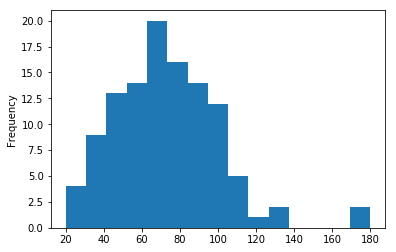

In [289]:
waterPokemon.Defense.plot(kind = 'hist',bins = 15)

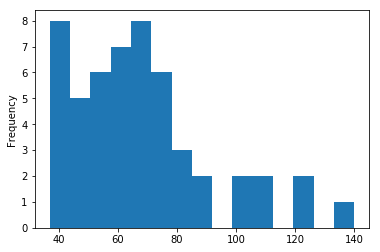

In [290]:
firePokemon.Defense.plot(kind = 'hist',bins = 15)

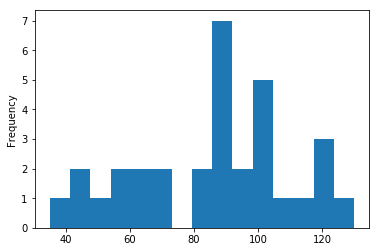

In [291]:
dragonPokemon.Defense.plot(kind = 'hist',bins = 15)

In [292]:
#######ERROR with how i am calculating the weighted winrate by type###############
def typeWinRate(pokemonArray, pokemonType):
    print('Type1: ', pokemonType, (sum(pokemonArray['Wins']) / (sum(pokemonArray['Wins']) + sum(pokemonArray['Losses'])))*100, '%')
print(data["Type 1"].unique())
print('Winrates by Type1')
typeWinRate(grassPokemon, 'Grass')
typeWinRate(firePokemon, 'Fire')
typeWinRate(waterPokemon, 'Water')
typeWinRate(bugPokemon, 'Bug')
typeWinRate(normalPokemon, 'Normal')
typeWinRate(poisonPokemon, 'Poison')
typeWinRate(electricPokemon, 'Electric')
typeWinRate(groundPokemon, 'Ground')
typeWinRate(fairyPokemon, 'Fairy')
typeWinRate(fightingPokemon, 'Fighting')
typeWinRate(psychicPokemon, 'Psychic')
typeWinRate(rockPokemon, 'Rock')
typeWinRate(ghostPokemon, 'Ghost')
typeWinRate(icePokemon, 'Ice')
typeWinRate(dragonPokemon, 'Dragon')
typeWinRate(darkPokemon, 'Dark')
typeWinRate(steelPokemon, 'Steel')
typeWinRate(flyingPokemon, 'Flying')

['Grass' 'Fire' 'Water' 'Bug' 'Normal' 'Poison' 'Electric' 'Ground'
 'Fairy' 'Fighting' 'Psychic' 'Rock' 'Ghost' 'Ice' 'Dragon' 'Dark' 'Steel'
 'Flying']
Winrates by Type1
Type1:  Grass 43.994778067885115 %
Type1:  Fire 58.02808302808303 %
Type1:  Water 46.784417064311654 %
Type1:  Bug 43.05936073059361 %
Type1:  Normal 53.876673830385194 %
Type1:  Poison 42.993979200875756 %
Type1:  Electric 63.03778526000748 %
Type1:  Ground 53.689894574440736 %
Type1:  Fairy 32.86843328684333 %
Type1:  Fighting 46.67271627344223 %
Type1:  Psychic 54.61748633879782 %
Type1:  Rock 40.55388957488093 %
Type1:  Ghost 48.02968270214944 %
Type1:  Ice 44.07275089314713 %
Type1:  Dragon 63.326551373346895 %
Type1:  Dark 63.64109232769831 %
Type1:  Steel 42.949802594472644 %
Type1:  Flying 75.73221757322176 %


In [293]:
data["Type 2"] == "Grass"
grassPokemon = data[data["Type 2"] == "Grass"]
data["Type 2"] == "Fire"
firePokemon = data[data["Type 2"] == "Fire"]
data["Type 2"] == "Water"
waterPokemon = data[data["Type 2"] == "Water"]
data["Type 2"] == "Bug"
bugPokemon = data[data["Type 2"] == "Bug"]
data["Type 2"] == "Normal"
normalPokemon = data[data["Type 2"] == "Normal"]
data["Type 2"] == "Poison"
poisonPokemon = data[data["Type 2"] == "Poison"]
data["Type 2"] == "Electric"
electricPokemon = data[data["Type 2"] == "Electric"]
data["Type 2"] == "Ground"
groundPokemon = data[data["Type 2"] == "Ground"]
data["Type 2"] == "Fairy"
fairyPokemon = data[data["Type 2"] == "Fairy"]
data["Type 2"] == "Fighting"
fightingPokemon = data[data["Type 2"] == "Fighting"]
data["Type 2"] == "Psychic"
psychicPokemon = data[data["Type 2"] == "Psychic"]
data["Type 2"] == "Rock"
rockPokemon = data[data["Type 2"] == "Rock"]
data["Type 2"] == "Ghost"
ghostPokemon = data[data["Type 2"] == "Ghost"]
data["Type 2"] == "Ice"
icePokemon = data[data["Type 2"] == "Ice"]
data["Type 2"] == "Dragon"
dragonPokemon = data[data["Type 2"] == "Dragon"]
data["Type 2"] == "Dark"
darkPokemon = data[data["Type 2"] == "Dark"]
data["Type 2"] == "Steel"
steelPokemon = data[data["Type 2"] == "Steel"]
data["Type 2"] == "Flying"
flyingPokemon = data[data["Type 2"] == "Flying"]

In [294]:
def typeWinRate(pokemonArray, pokemonType):
    print('Type2: ', pokemonType, (sum(pokemonArray['Wins']) / (sum(pokemonArray['Wins']) + sum(pokemonArray['Losses'])))*100, '%')
print(data["Type 2"].unique())
print('Winrates by Type1')
typeWinRate(grassPokemon, 'Grass')
typeWinRate(firePokemon, 'Fire')
typeWinRate(waterPokemon, 'Water')
typeWinRate(bugPokemon, 'Bug')
typeWinRate(normalPokemon, 'Normal')
typeWinRate(poisonPokemon, 'Poison')
typeWinRate(electricPokemon, 'Electric')
typeWinRate(groundPokemon, 'Ground')
typeWinRate(fairyPokemon, 'Fairy')
typeWinRate(fightingPokemon, 'Fighting')
typeWinRate(psychicPokemon, 'Psychic')
typeWinRate(rockPokemon, 'Rock')
typeWinRate(ghostPokemon, 'Ghost')
typeWinRate(icePokemon, 'Ice')
typeWinRate(dragonPokemon, 'Dragon')
typeWinRate(darkPokemon, 'Dark')
typeWinRate(steelPokemon, 'Steel')
typeWinRate(flyingPokemon, 'Flying')

['Poison' nan 'Flying' 'Dragon' 'Ground' 'Fairy' 'Grass' 'Fighting'
 'Psychic' 'Steel' 'Ice' 'Rock' 'Dark' 'Water' 'Electric' 'Fire' 'Ghost'
 'Bug' 'Normal']
Winrates by Type1
Type2:  Grass 41.49417852522639 %
Type2:  Fire 63.80890052356021 %
Type2:  Water 40.75699396599013 %
Type2:  Bug 44.91315136476427 %
Type2:  Normal 64.15094339622641 %
Type2:  Poison 45.10627780523974 %
Type2:  Electric 53.25153374233129 %
Type2:  Ground 37.4 %
Type2:  Fairy 42.92821606254442 %
Type2:  Fighting 67.74580335731414 %
Type2:  Psychic 51.36196319018404 %
Type2:  Rock 28.159645232815965 %
Type2:  Ghost 44.62759462759463 %
Type2:  Ice 57.97842135150483 %
Type2:  Dragon 60.37256562235393 %
Type2:  Dark 59.5895816890292 %
Type2:  Steel 49.943630214205186 %
Type2:  Flying 66.42306130734876 %


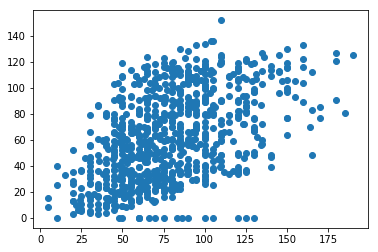

In [295]:
x = []
y = []
for pokemon in data['Attack']:
    x.append(pokemon)
for pokemon in data['Wins']:
    y.append(pokemon)
plt.scatter(x,y)

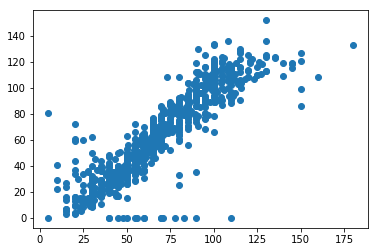

In [296]:
x = []
for pokemon in data['Speed']:
    x.append(pokemon)
plt.scatter(x,y)

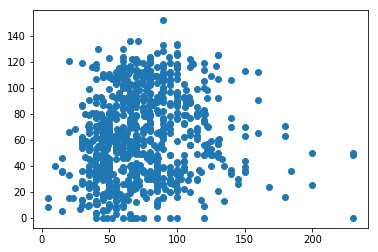

In [297]:
x = []
for pokemon in data['Defense']:
    x.append(pokemon)
plt.scatter(x,y)

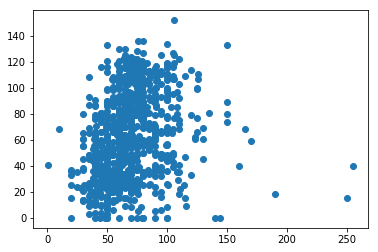

In [298]:
x = []
for pokemon in data['HP']:
    x.append(pokemon)
plt.scatter(x,y)

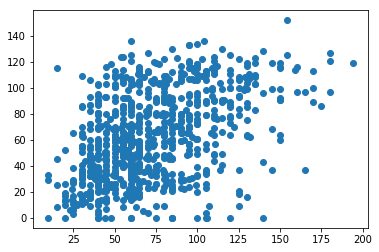

In [299]:
x = []
for pokemon in data['Sp. Atk']:
    x.append(pokemon)
plt.scatter(x,y)

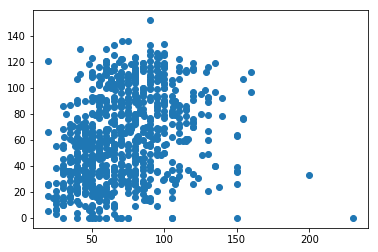

In [300]:
x = []
for pokemon in data['Sp. Def']:
    x.append(pokemon)
plt.scatter(x,y)

In [301]:
print(sum(data['Wins']))
print(len(data["Wins"]))
average = sum(data['Wins'])/len(data['Wins'])
print(average)

50000
800
62.5


Legendaries vs Average wins


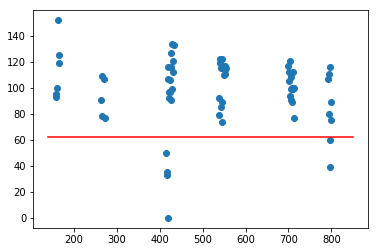

In [302]:
x = []
y = []
for index, row in data.iterrows():
    if(row['Legendary'] == True):
        x.append(row['#'])
        y.append(row['Wins'])
print("Legendaries vs Average wins")
plt.scatter(x,y)
lineX = [140, 850]
avg = [average, average]
plt.plot(lineX, avg, color='red')

In [303]:
gen1 = data[data["Generation"] == 1]
gen2 = data[data["Generation"] == 2]
gen3 = data[data["Generation"] == 3]
gen4 = data[data["Generation"] == 4]
gen5 = data[data["Generation"] == 5]
gen6 = data[data["Generation"] == 6]
print('Winrates by Generation')
print('gen1', (sum(gen1['Wins']) / numBattles)*100, '%')
print('gen2', (sum(gen2['Wins']) / numBattles)*100, '%')
print('gen3', (sum(gen3['Wins']) / numBattles)*100, '%')
print('gen4', (sum(gen4['Wins']) / numBattles)*100, '%')
print('gen5', (sum(gen5['Wins']) / numBattles)*100, '%')
print('gen6', (sum(gen6['Wins']) / numBattles)*100, '%')

Winrates by Generation
gen1 21.026 %
gen2 11.932 %
gen3 19.416 %
gen4 16.32 %
gen5 21.324 %
gen6 9.982000000000001 %


In [304]:
sortedWinrate = data.sort_values("Winrate", ascending=False)
print(sortedWinrate.head(10))

       #                      Name   Type 1    Type 2   HP  Attack  Defense  \
154  155           Mega Aerodactyl     Rock    Flying   80     135       85   
512  513                   Weavile     Dark       Ice   70     120       65   
703  704    Tornadus Therian Forme   Flying       NaN   79     100       80   
19    20             Mega Beedrill      Bug    Poison   65     150       40   
153  154                Aerodactyl     Rock    Flying   80     105       65   
476  477              Mega Lopunny   Normal  Fighting   65     136       94   
726  727                  Greninja    Water      Dark   72      95       67   
716  717  Meloetta Pirouette Forme   Normal  Fighting  100     128       90   
164  165             Mega Mewtwo Y  Psychic       NaN  106     150       70   
349  350             Mega Sharpedo    Water      Dark   70     140       70   

     Sp. Atk  Sp. Def  Speed  Generation  Legendary  Wins    Winrate  Losses  
154       70       95    150           1      False

In [305]:
# for pokeType in data['Type 1']:
#     if (pokeType == )
type1Array = []
for val in data["Type 1"].unique():
    type1Array.append(val)
type2Array = []
for val in data["Type 2"].unique():
    type2Array.append(val)
legendaryArray = []
for val in data["Legendary"].unique():
    legendaryArray.append(val)
newType1 = []
newType2 = []
newLegendaryArray = []
for index, row in data.iterrows():
    newType1.append(type1Array.index(row['Type 1']))
    newType2.append(type2Array.index(row['Type 2']))
    newLegendaryArray.append(legendaryArray.index(row["Legendary"]))
# print(data["Type 1"].unique())
# print(data["Type 2"].unique())
# print(newType1)
columnName = "Type 1"
data[columnName] = newType1
columnName = "Type 2"
data[columnName] = newType2
columnName = "Legendary"
data[columnName] = newLegendaryArray
print(data.loc[[1]])

   #     Name  Type 1  Type 2  HP  Attack  Defense  Sp. Atk  Sp. Def  Speed  \
1  2  Ivysaur       0       0  60      62       63       80       80     60   

   Generation  Legendary  Wins    Winrate  Losses  
1           1          0    46  38.016529      75  


In [330]:
#Not Normalized Version
firstPokeNumberArray = []
firstPokeType1 = []
firstPokeType2 = []
firstPokeHP = []
firstPokeAttack = []
firstPokeDefense = []
firstPokeSpAtk = []
firstPokeSpDef = []
firstPokeSpeed = []
firstPokeGeneration = []
firstPokeLegendary = []

for pokemon in battleData["First_pokemon"]:
    pokemon = data.loc[[pokemon-1]]
    firstPokeNumberArray.append(float(pokemon['#']))
    firstPokeType1.append(float(pokemon['Type 1']))
    firstPokeType2.append(float(pokemon['Type 2']))
    firstPokeHP.append(float(pokemon['HP']) / max(data['HP']))
    firstPokeAttack.append(float(pokemon['Attack']))
    firstPokeDefense.append(float(pokemon['Defense']))
    firstPokeSpAtk.append(float(pokemon['Sp. Atk']))
    firstPokeSpDef.append(float(pokemon['Sp. Def']))
    firstPokeSpeed.append(float(pokemon['Speed']))
    firstPokeGeneration.append(float(pokemon['Generation']))
    firstPokeLegendary.append(float(pokemon['Legendary']))
                       
secondPokeNumberArray = []
secondPokeType1 = []
secondPokeType2 = []
secondPokeHP = []
secondPokeAttack = []
secondPokeDefense = []
secondPokeSpAtk = []
secondPokeSpDef = []
secondPokeSpeed = []
secondPokeGeneration = []
secondPokeLegendary = []
for pokemon in battleData["Second_pokemon"]:
    pokemon = data.loc[[pokemon-1]]
    secondPokeNumberArray.append(float(pokemon['#']))
    secondPokeType1.append(float(pokemon['Type 1']))
    secondPokeType2.append(float(pokemon['Type 2']))
    secondPokeHP.append(float(pokemon['HP']))
    secondPokeAttack.append(float(pokemon['Attack']))
    secondPokeDefense.append(float(pokemon['Defense']))
    secondPokeSpAtk.append(float(pokemon['Sp. Atk']))
    secondPokeSpDef.append(float(pokemon['Sp. Def']))
    secondPokeSpeed.append(float(pokemon['Speed']))
    secondPokeGeneration.append(float(pokemon['Generation']))
    secondPokeLegendary.append(float(pokemon['Legendary']))
                       
columnName = "1#"
battleData[columnName] = firstPokeNumberArray
columnName = "2#"
battleData[columnName] = secondPokeNumberArray
columnName = "1Type1"
battleData[columnName] = firstPokeType1
columnName = "2Type1"
battleData[columnName] = secondPokeType1
columnName = "1Type2"
battleData[columnName] = firstPokeType2
columnName = "2Type2"
battleData[columnName] = secondPokeType2
columnName = "1HP"
battleData[columnName] = firstPokeHP
columnName = "2HP"
battleData[columnName] = secondPokeHP
columnName = "1Attack"
battleData[columnName] = firstPokeAttack
columnName = "2Attack"
battleData[columnName] = secondPokeAttack
columnName = "1Defense"
battleData[columnName] = firstPokeDefense
columnName = "2Defense"
battleData[columnName] = secondPokeDefense
columnName = "1SpAtk"
battleData[columnName] = firstPokeSpAtk
columnName = "2SpAtk"
battleData[columnName] = secondPokeSpAtk
columnName = "1SpDef"
battleData[columnName] = firstPokeSpDef
columnName = "2SpDef"
battleData[columnName] = secondPokeSpDef
columnName = "1Speed"
battleData[columnName] = firstPokeSpeed
columnName = "2Speed"
battleData[columnName] = secondPokeSpeed
columnName = "1Generation"
battleData[columnName] = firstPokeGeneration
columnName = "2Generation"
battleData[columnName] = secondPokeGeneration
columnName = "1Legendary"
battleData[columnName] = firstPokeLegendary
columnName = "2Legendary"
battleData[columnName] = secondPokeLegendary
del battleData['First_pokemon']
del battleData['Second_pokemon']

newWinnerArray = []
for pokemon in battleData['Winner']:
    pokemon = data.loc[[pokemon-1]]
    newWinnerArray.append(float(pokemon['#']))
columnName = "Winner"
battleData[columnName] = newWinnerArray
battleData = battleData.astype('float32')
print("DONE")

DONE


In [332]:
print(battleData.head(1))

   Winner     1#     2#  1Type1  2Type1  1Type2  2Type2       1HP   2HP  \
0   298.0  266.0  298.0    11.0     0.0     4.0    12.0  0.196078  70.0   

   1Attack     ...      1SpAtk  2SpAtk  1SpDef  2SpDef  1Speed  2Speed  \
0     64.0     ...        45.0    60.0    50.0    40.0    41.0    60.0   

   1Generation  2Generation  1Legendary  2Legendary  
0          2.0          3.0         0.0         0.0  

[1 rows x 23 columns]


In [308]:
print(type(battleData.loc[[1]]['1#']))
shuffledBattleData = battleData.sample(frac=1)
print(shuffledBattleData.head(1))

msk = np.random.rand(len(shuffledBattleData)) < 0.6

test = shuffledBattleData[msk]

train = shuffledBattleData[~msk]

print(len(train))
print(len(test))
# print(battleData.columns)
import tensorflow as tf
from tensorflow import keras

   Winner     1#     2#  1Type1  2Type1  1Type2  2Type2       1HP   2HP  \
0   298.0  266.0  298.0    11.0     0.0     4.0    12.0  0.196078  70.0   

   1Attack     ...      1SpAtk  2SpAtk  1SpDef  2SpDef  1Speed  2Speed  \
0     64.0     ...        45.0    60.0    50.0    40.0    41.0    60.0   

   1Generation  2Generation  1Legendary  2Legendary  
0          2.0          3.0         0.0         0.0  

[1 rows x 23 columns]
<class 'pandas.core.series.Series'>
       Winner     1#     2#  1Type1  2Type1  1Type2  2Type2       1HP   2HP  \
15935   410.0  293.0  410.0     3.0    14.0     0.0     2.0  0.235294  95.0   

       1Attack     ...      1SpAtk  2SpAtk  1SpDef  2SpDef  1Speed  2Speed  \
15935     50.0     ...        50.0   120.0    90.0    90.0    65.0   120.0   

       1Generation  2Generation  1Legendary  2Legendary  
15935          3.0          3.0         0.0         0.0  

[1 rows x 23 columns]
20194
29806


In [325]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(22,)),
    keras.layers.Dense(44, activation=tf.nn.relu),
    keras.layers.Dense(44, activation=tf.nn.relu),
    keras.layers.Dense(44, activation=tf.nn.relu),
    keras.layers.Dense(44, activation=tf.nn.relu),
    keras.layers.Dense(44, activation=tf.nn.relu),
    keras.layers.Dense(44, activation=tf.nn.relu),
    keras.layers.Dense(801, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
indices = []
for i in range(1, 23):
    indices.append(i)
features=list(train.columns[indices])
print(features)
model.fit(train[features], train['Winner'], epochs=20)

['1#', '2#', '1Type1', '2Type1', '1Type2', '2Type2', '1HP', '2HP', '1Attack', '2Attack', '1Defense', '2Defense', '1SpAtk', '2SpAtk', '1SpDef', '2SpDef', '1Speed', '2Speed', '1Generation', '2Generation', '1Legendary', '2Legendary']
Epoch 1/20
20194/20194 [==============================] - 5s 231us/sample - loss: 6.2967 - acc: 0.0067
Epoch 2/20
20194/20194 [==============================] - 4s 185us/sample - loss: 5.4043 - acc: 0.0258
Epoch 3/20
20194/20194 [==============================] - 4s 189us/sample - loss: 4.6785 - acc: 0.0706
Epoch 4/20
20194/20194 [==============================] - 4s 198us/sample - loss: 3.9376 - acc: 0.1503
Epoch 5/20
20194/20194 [==============================] - 5s 224us/sample - loss: 3.3811 - acc: 0.2279
Epoch 6/20
20194/20194 [==============================] - 4s 210us/sample - loss: 2.9806 - acc: 0.3037
Epoch 7/20
20194/20194 [==============================] - 4s 183us/sample - loss: 2.6630 - acc: 0.3666
Epoch 8/20
20194/20194 [========================

In [274]:
test_loss, test_acc = model.evaluate(test[features], test['Winner'])

print('Test accuracy:', test_acc)

In [274]:
#Normalized Version
firstPokeNumberArray = []
firstPokeType1 = []
firstPokeType2 = []
firstPokeHP = []
firstPokeAttack = []
firstPokeDefense = []
firstPokeSpAtk = []
firstPokeSpDef = []
firstPokeSpeed = []
firstPokeGeneration = []
firstPokeLegendary = []

for pokemon in battleData["First_pokemon"]:
    pokemon = data.loc[[pokemon-1]]
    firstPokeNumberArray.append(float(pokemon['#']) / max(data['#']))
    firstPokeType1.append(float(pokemon['Type 1']) / max(data['Type 1']))
    firstPokeType2.append(float(pokemon['Type 2']) / max(data['Type 2']))
    firstPokeHP.append(float(pokemon['HP']) / max(data['HP']))
    firstPokeAttack.append(float(pokemon['Attack']) / max(data['Attack']))
    firstPokeDefense.append(float(pokemon['Defense']) / max(data['Defense']))
    firstPokeSpAtk.append(float(pokemon['Sp. Atk']) / max(data['Sp. Atk']))
    firstPokeSpDef.append(float(pokemon['Sp. Def']) / max(data['Sp. Def']))
    firstPokeSpeed.append(float(pokemon['Speed']) / max(data['Speed']))
    firstPokeGeneration.append(float(pokemon['Generation']) / max(data['Generation']))
    firstPokeLegendary.append(float(pokemon['Legendary']) / max(data['Legendary']))
                       
secondPokeNumberArray = []
secondPokeType1 = []
secondPokeType2 = []
secondPokeHP = []
secondPokeAttack = []
secondPokeDefense = []
secondPokeSpAtk = []
secondPokeSpDef = []
secondPokeSpeed = []
secondPokeGeneration = []
secondPokeLegendary = []
for pokemon in battleData["Second_pokemon"]:
    pokemon = data.loc[[pokemon-1]]
    secondPokeNumberArray.append(float(pokemon['#']) / max(data['#']))
    secondPokeType1.append(float(pokemon['Type 1']) / max(data['Type 1']))
    secondPokeType2.append(float(pokemon['Type 2']) / max(data['Type 2']))
    secondPokeHP.append(float(pokemon['HP']) / max(data['HP']))
    secondPokeAttack.append(float(pokemon['Attack']) / max(data['Attack']))
    secondPokeDefense.append(float(pokemon['Defense']) / max(data['Defense']))
    secondPokeSpAtk.append(float(pokemon['Sp. Atk']) / max(data['Sp. Atk']))
    secondPokeSpDef.append(float(pokemon['Sp. Def']) / max(data['Sp. Def']))
    secondPokeSpeed.append(float(pokemon['Speed']) / max(data['Speed']))
    secondPokeGeneration.append(float(pokemon['Generation']) / max(data['Generation']))
    secondPokeLegendary.append(float(pokemon['Legendary']) / max(data['Legendary']))
                       
columnName = "1#"
battleData[columnName] = firstPokeNumberArray
columnName = "2#"
battleData[columnName] = secondPokeNumberArray
columnName = "1Type1"
battleData[columnName] = firstPokeType1
columnName = "2Type1"
battleData[columnName] = secondPokeType1
columnName = "1Type2"
battleData[columnName] = firstPokeType2
columnName = "2Type2"
battleData[columnName] = secondPokeType2
columnName = "1HP"
battleData[columnName] = firstPokeHP
columnName = "2HP"
battleData[columnName] = secondPokeHP
columnName = "1Attack"
battleData[columnName] = firstPokeAttack
columnName = "2Attack"
battleData[columnName] = secondPokeAttack
columnName = "1Defense"
battleData[columnName] = firstPokeDefense
columnName = "2Defense"
battleData[columnName] = secondPokeDefense
columnName = "1SpAtk"
battleData[columnName] = firstPokeSpAtk
columnName = "2SpAtk"
battleData[columnName] = secondPokeSpAtk
columnName = "1SpDef"
battleData[columnName] = firstPokeSpDef
columnName = "2SpDef"
battleData[columnName] = secondPokeSpDef
columnName = "1Speed"
battleData[columnName] = firstPokeSpeed
columnName = "2Speed"
battleData[columnName] = secondPokeSpeed
columnName = "1Generation"
battleData[columnName] = firstPokeGeneration
columnName = "2Generation"
battleData[columnName] = secondPokeGeneration
columnName = "1Legendary"
battleData[columnName] = firstPokeLegendary
columnName = "2Legendary"
battleData[columnName] = secondPokeLegendary
del battleData['First_pokemon']
del battleData['Second_pokemon']

newWinnerArray = []
for pokemon in battleData['Winner']:
    pokemon = data.loc[[pokemon-1]]
    newWinnerArray.append(float(pokemon['#']) 
                          / max(battleData["Winner"]))
columnName = "Winner"
battleData[columnName] = newWinnerArray
battleData = battleData.astype('float32')
print("DONE")

DONE


In [235]:
print(battleData.head(1))
print(type(battleData.loc[[1]]['1#']))
shuffledBattleData = battleData.sample(frac=1)
print(shuffledBattleData.head(1))

msk = np.random.rand(len(shuffledBattleData)) < 0.9

test = shuffledBattleData[msk]

train = shuffledBattleData[~msk]

print(len(train))
print(len(test))
# print(battleData.columns)

   Winner      1#      2#    1Type1  2Type1    1Type2    2Type2       1HP  \
0  0.3725  0.3325  0.3725  0.647059     0.0  0.222222  0.666667  0.196078   

       2HP   1Attack     ...        1SpAtk    2SpAtk    1SpDef    2SpDef  \
0  0.27451  0.336842     ...      0.231959  0.309278  0.217391  0.173913   

     1Speed    2Speed  1Generation  2Generation  1Legendary  2Legendary  
0  0.227778  0.333333     0.333333          0.5         0.0         0.0  

[1 rows x 23 columns]
<class 'pandas.core.series.Series'>
       Winner     1#     2#    1Type1    2Type1    1Type2    2Type2       1HP  \
42401   0.895  0.945  0.895  0.470588  0.235294  0.055556  0.444444  0.321569   

            2HP   1Attack     ...        1SpAtk    2SpAtk    1SpDef    2SpDef  \
42401  0.392157  0.421053     ...      0.438144  0.659794  0.326087  0.556522   

       1Speed  2Speed  1Generation  2Generation  1Legendary  2Legendary  
42401     0.4     0.5          1.0     0.833333         0.0         0.0  

[1 rows x 

In [239]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(22,)),
    keras.layers.Dense(22, activation=tf.nn.relu),
    keras.layers.Dense(801, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
indices = []
for i in range(1, 23):
    indices.append(i)
features=list(train.columns[indices])
print(features)
model.fit(train[features], train['Winner'], epochs=2)

['1#', '2#', '1Type1', '2Type1', '1Type2', '2Type2', '1HP', '2HP', '1Attack', '2Attack', '1Defense', '2Defense', '1SpAtk', '2SpAtk', '1SpDef', '2SpDef', '1Speed', '2Speed', '1Generation', '2Generation', '1Legendary', '2Legendary']
Epoch 1/2
5030/5030 [==============================] - 1s 227us/sample - loss: 3.8332 - acc: 0.8634
Epoch 2/2
5030/5030 [==============================] - 1s 137us/sample - loss: 0.0611 - acc: 0.9986


In [234]:
test_loss, test_acc = model.evaluate(test[features], test['Winner'])

print('Test accuracy:', test_acc)

49553/49553 [==============================] - 5s 94us/sample - loss: 6.1254 - acc: 0.9985
Test accuracy: 0.99848646
